# Usecase: apply SCM on regression tasks generated by sklearn


## Step 1: Prepare environment


- Set up the runtime


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys

project_dir = os.getcwd()
while not os.path.exists(os.path.join(project_dir, ".git")):
    project_dir = os.path.dirname(project_dir)
print(f"Project directory: {project_dir}")
sys.path.insert(0, project_dir)

Project directory: /home/xj265/phd/codebase/Euphratica/Euphratica-dev


- Import customised libraries


In [3]:
import lingam
import numpy as np
from lingam.utils import make_dot
from sklearn.datasets import make_regression
from tabeval.plugins import Plugins

## Step 2: Specify the results of interest

* Generate the data with known causal structure

In [4]:
X, y, coef = make_regression(
    n_samples=100000,
    n_features=10,
    n_informative=5,
    noise=0.1,
    coef=True,
    random_state=42,
)
X.shape, y.shape

((100000, 10), (100000,))

## Step 3: Export results


* Fit the model

In [5]:
model = lingam.DirectLiNGAM()
model.fit(np.concatenate([X, y.reshape(-1, 1)], axis=1))

* Compare the causal roots and informative feature

In [6]:
coef

array([ 0.        , 71.5561938 , 90.17260756,  0.        ,  0.        ,
       21.14662516,  0.        , 56.03943168, 84.91182137,  0.        ])

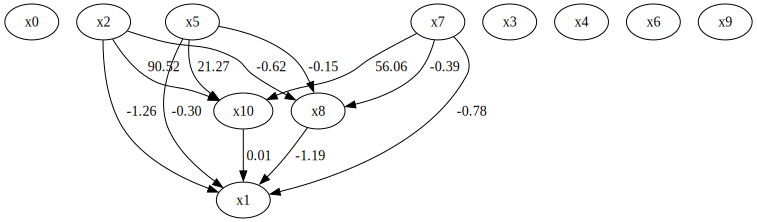

In [7]:
make_dot(model.adjacency_matrix_)